In [1]:
import os

def list_directory_structure(startpath):
    """
    Prints a tree-like structure of a directory.
    """
    # Check if the path exists before proceeding
    if not os.path.exists(startpath):
        print(f"Error: The path '{startpath}' does not exist.")
        print("Please make sure you have uploaded your dataset and the path is correct.")
        return
        
    print(f"Structure for: {startpath}\n")
    for root, dirs, files in os.walk(startpath):
        # Determine the level of depth for indentation
        # Use a relative path for cleaner output
        relative_root = os.path.relpath(root, startpath)
        level = relative_root.count(os.sep) if relative_root != '.' else 0
        
        indent = ' ' * 4 * level
        
        # Print the current directory name
        print(f'{indent}├── {os.path.basename(root)}/')
        
        # Print the files in the current directory
        sub_indent = ' ' * 4 * (level + 1)
        for f in files:
            # You can add a condition to ignore system files like .ipynb_checkpoints
            if '.ipynb_checkpoints' not in f:
                print(f'{sub_indent}├── {f}')

# --- CONFIGURATION FOR SAGEMAKER STUDIO ---

# IMPORTANT: Change 'my_dataset' to the actual name of your uploaded dataset folder.
# This script assumes the dataset folder is in the same directory as your script/notebook.
your_dataset_path = 'Dataset' 

# If your dataset is in a subfolder, you would change it to something like:
# your_dataset_path = 'my_project_folder/my_dataset'

# --- Run the function ---
list_directory_structure(your_dataset_path)

Structure for: Dataset

├── Dataset/
├── AR_Train/
    ├── defect/
        ├── dataset-20250804T094730.manifest
        ├── dataset-20250804T094811.manifest
        ├── dataset-20250804T094811.manifest.json
        ├── PEC_sticker/
            ├── 2025-05-13_053Z_40-(180.0)(90.0).jpg
            ├── 2025-05-13_053Z_41-(180.0)(90.0).jpg
            ├── 2025-05-13_053Z_42-(180.0)(90.0).jpg
            ├── 2025-05-13_225Z_38-(180.0)(90.0).jpg
            ├── 2025-05-13_225Z_39-(180.0)(90.0).jpg
            ├── 2025-05-13_225Z_40-(180.0)(90.0).jpg
            ├── 2025-05-13_330Z_40-(180.0)(90.0).jpg
            ├── 2025-05-13_330Z_41-(180.0)(90.0).jpg
            ├── 2025-05-13_330Z_42-(180.0)(90.0).jpg
            ├── 2025-05-13_334Z_41-(180.0)(90.0).jpg
            ├── 2025-05-13_334Z_42-(180.0)(90.0).jpg
            ├── 2025-05-13_371Z_40-(180.0)(90.0).jpg
            ├── 2025-05-13_371Z_41-(180.0)(90.0).jpg
            ├── 2025-05-13_371Z_42-(180.0)(90.0).jpg
            ├── 2025-05-13

In [6]:
import os
import pandas as pd

# --- Configuration ---
# Set the path to the top-level directory containing the images.
# In your case, this is the 'defect' folder.
DATA_ROOT = 'Dataset/AR_Train/defect'

# --- Loading Logic ---
filepaths = []
labels = []

# Define classes you want to load to avoid unwanted directories
# This is the most reliable way to handle complex structures.
TARGET_CLASSES = [
    'lighting_panel', 
    'frosted_window', 
    'shifted_grab_handle'
]

print(f"Scanning directory: {DATA_ROOT}")

for root, dirs, files in os.walk(DATA_ROOT):
    # The current directory's name is a potential class label
    current_folder_name = os.path.basename(root)
    
    # Check if the current folder is one of our target classes
    if current_folder_name in TARGET_CLASSES:
        print(f"Found class: '{current_folder_name}'. Loading images...")
        for filename in files:
            # Make sure we're only adding image files
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                filepath = os.path.join(root, filename)
                
                filepaths.append(filepath)
                labels.append(current_folder_name)

# --- Create a DataFrame for easy analysis ---
if not filepaths:
    print("\nError: No images were found!")
    print("Please check the 'DATA_ROOT' path and 'TARGET_CLASSES' list.")
else:
    df = pd.DataFrame({'filepath': filepaths, 'label': labels})
    print(f"\n✅ Successfully loaded {len(df)} images from {df['label'].nunique()} classes.")
    print("\nDataFrame Head:")
    print(df.head())
    print("\nClass Counts:")
    print(df['label'].value_counts())

Scanning directory: Dataset/AR_Train/defect
Found class: 'frosted_window'. Loading images...
Found class: 'lighting_panel'. Loading images...
Found class: 'shifted_grab_handle'. Loading images...

✅ Successfully loaded 1511 images from 3 classes.

DataFrame Head:
                                            filepath           label
0  Dataset/AR_Train/defect/frosted_window/2025-02...  frosted_window
1  Dataset/AR_Train/defect/frosted_window/2025-02...  frosted_window
2  Dataset/AR_Train/defect/frosted_window/2025-02...  frosted_window
3  Dataset/AR_Train/defect/frosted_window/2025-02...  frosted_window
4  Dataset/AR_Train/defect/frosted_window/2025-02...  frosted_window

Class Counts:
label
lighting_panel         818
frosted_window         471
shifted_grab_handle    222
Name: count, dtype: int64


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 145.7 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 164.1 MB/s  0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4━━━━━ 0/2 [numpy]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [opencv-python]0m [opencv-python]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.4.0 requires nvidia-ml-py3<8.0,>=7.352.0, which is not installed.
amazon-sagemaker-jupyter-ai-q-developer 1.2.7 requires numpy<=2.0.1, but you have numpy 2.2.6 which is incompatible.
amazon-sagemaker-sql-magic 0.1.4 requires numpy<2, but you have numpy 2.2.6 which is incompatible.
autogluon-multimodal 1.4.0 requires transformers[sentencepiece]<4.50,>=4.38.0, but you have transformer

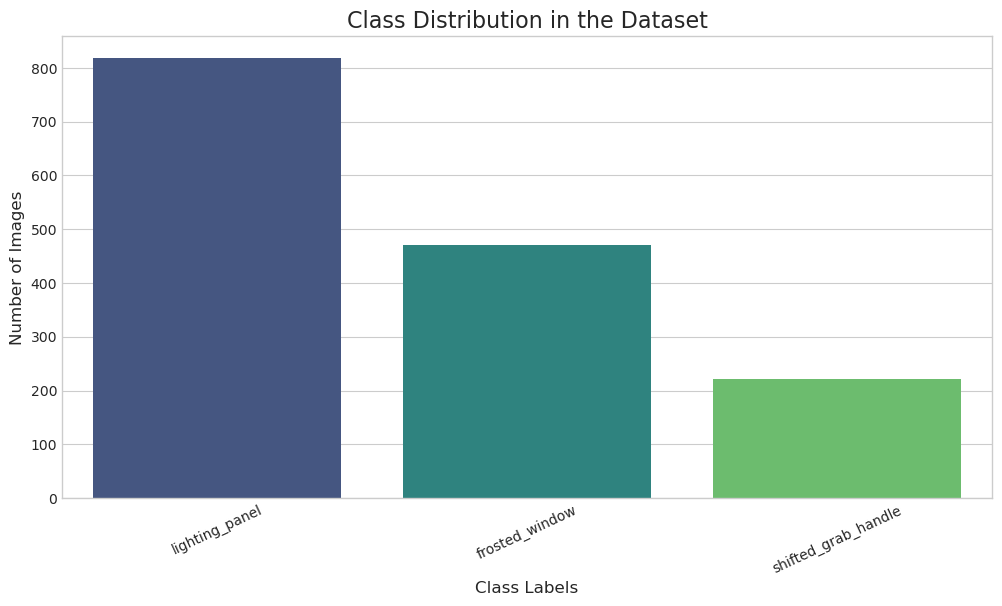


--- Displaying Sample Images from Each Class ---


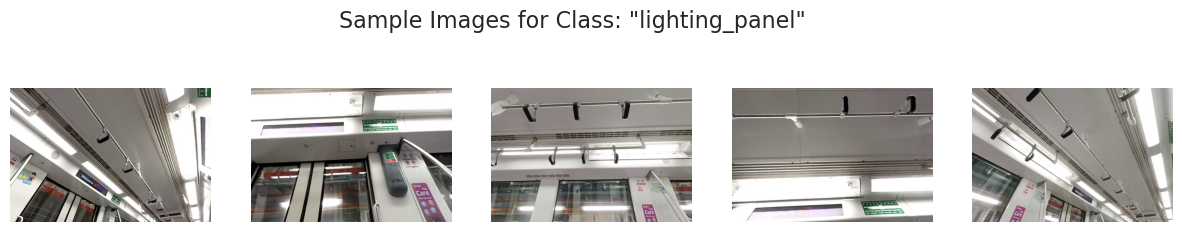

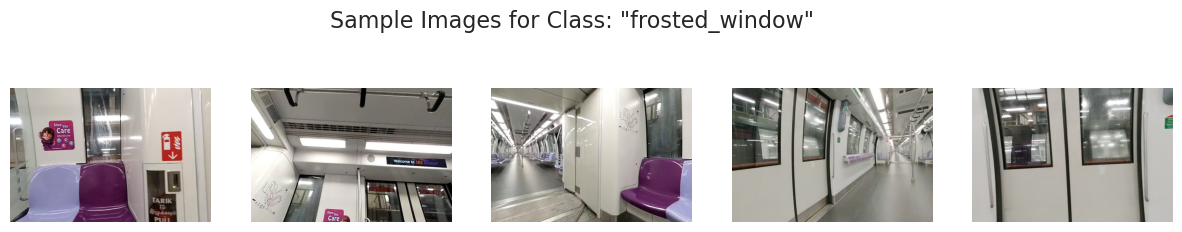

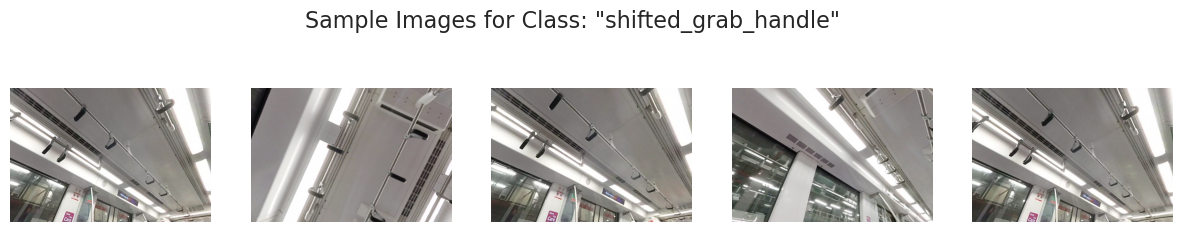


--- Analyzing Image Properties (Dimensions, Aspect Ratio, Color) ---


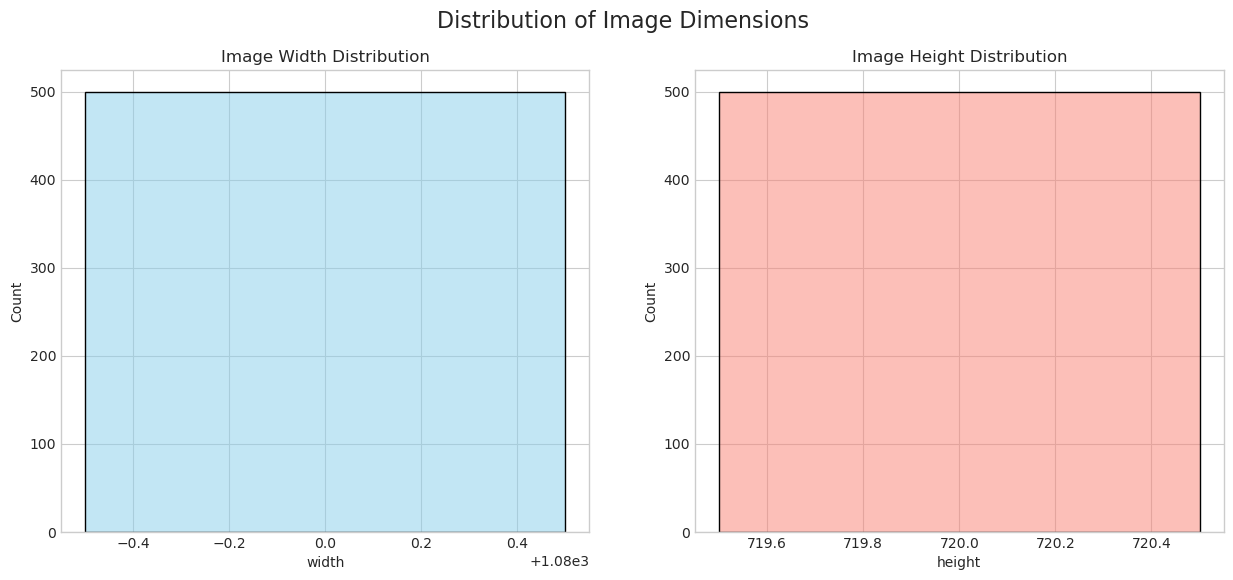

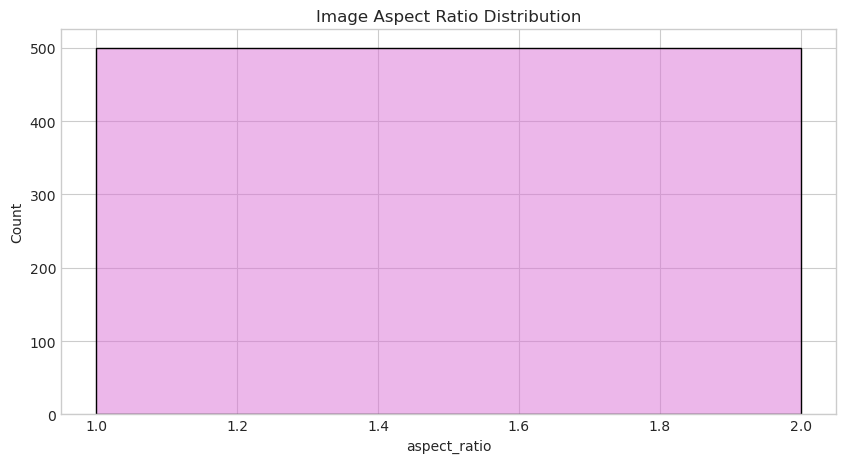


Analyzing color distribution for a random sample: 2025-02-18_962Z_159-(0.0)(90.0).jpg


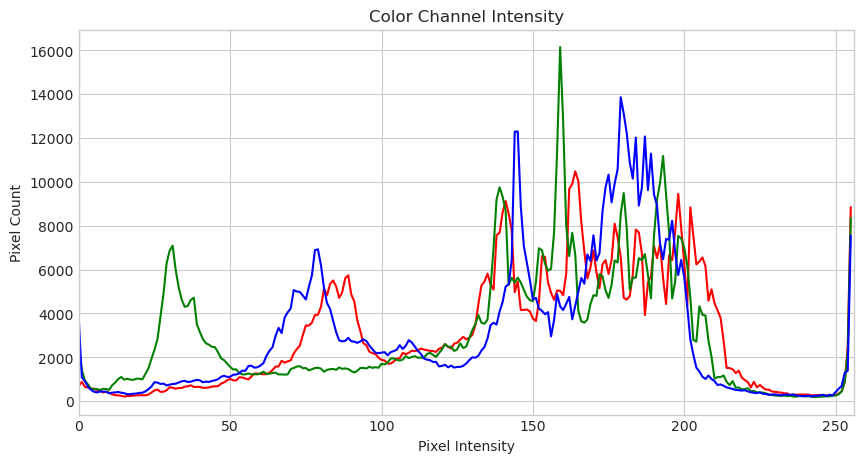

In [9]:
%pip install opencv-python
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Set a style for all plots
plt.style.use('seaborn-v0_8-whitegrid')
if not filepaths:
    print("\n❌ Error: No images were found! Check your DATA_ROOT and TARGET_CLASSES.")
else:
    df = pd.DataFrame({'filepath': filepaths, 'label': labels})
    print(f"\n✅ Successfully loaded {len(df)} images from {df['label'].nunique()} classes.")

    # --- 3. ANALYZE CLASS DISTRIBUTION ---
    print("\n--- Running Class Distribution Analysis ---")
    class_counts = df['label'].value_counts()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
    plt.title('Class Distribution in the Dataset', fontsize=16)
    plt.xlabel('Class Labels', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    plt.xticks(rotation=25)
    plt.show()

    # --- 4. VISUALIZE SAMPLE IMAGES ---
    print("\n--- Displaying Sample Images from Each Class ---")
    for cls in TARGET_CLASSES:
        class_df = df[df['label'] == cls].sample(n=min(5, len(df[df['label']==cls])), random_state=42)
        plt.figure(figsize=(15, 3))
        plt.suptitle(f'Sample Images for Class: "{cls}"', fontsize=16)
        for i, row in enumerate(class_df.itertuples()):
            ax = plt.subplot(1, 5, i + 1)
            img = Image.open(row.filepath)
            plt.imshow(img)
            plt.axis('off')
        plt.show()

    # --- 5. ANALYZE IMAGE PROPERTIES ---
    print("\n--- Analyzing Image Properties (Dimensions, Aspect Ratio, Color) ---")
    # Sample a subset for faster analysis
    sample_df = df.sample(n=min(500, len(df)), random_state=42)
    heights, widths = [], []
    for filepath in sample_df['filepath']:
        try:
            with Image.open(filepath) as img:
                width, height = img.size
                widths.append(width)
                heights.append(height)
        except Exception as e:
            print(f"Could not read {filepath}: {e}")
            
    sample_df = sample_df.assign(height=heights, width=widths)

    # Plot Dimensions
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    sns.histplot(sample_df['width'], ax=axes[0], kde=True, color='skyblue').set_title('Image Width Distribution')
    sns.histplot(sample_df['height'], ax=axes[1], kde=True, color='salmon').set_title('Image Height Distribution')
    plt.suptitle('Distribution of Image Dimensions', fontsize=16)
    plt.show()

    # Plot Aspect Ratios
    sample_df['aspect_ratio'] = sample_df['width'] / sample_df['height']
    plt.figure(figsize=(10, 5))
    sns.histplot(sample_df['aspect_ratio'], kde=True, color='orchid').set_title('Image Aspect Ratio Distribution')
    plt.show()

    # Plot Color Histogram for one random image
    random_image_path = df['filepath'].sample(1).iloc[0]
    print(f"\nAnalyzing color distribution for a random sample: {os.path.basename(random_image_path)}")
    img_cv = cv2.imread(random_image_path)
    img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
    
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(10, 5))
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.title('Color Channel Intensity')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Pixel Count')
    plt.xlim([0, 256])
    plt.grid(True)
    plt.show()

Scanning for defect images in: Dataset/AR_Train/defect
Scanning for non-defect images in: Dataset/AR_Train/non-defect

✅ Successfully loaded 3423 images.

Total images per category:
category
non_defect    1912
defect        1511
Name: count, dtype: int64

Total images per target class:
target_class
lighting_panel         1976
frosted_window         1024
shifted_grab_handle     423
Name: count, dtype: int64

--- Displaying Comparison: Defect vs. Non-Defect ---


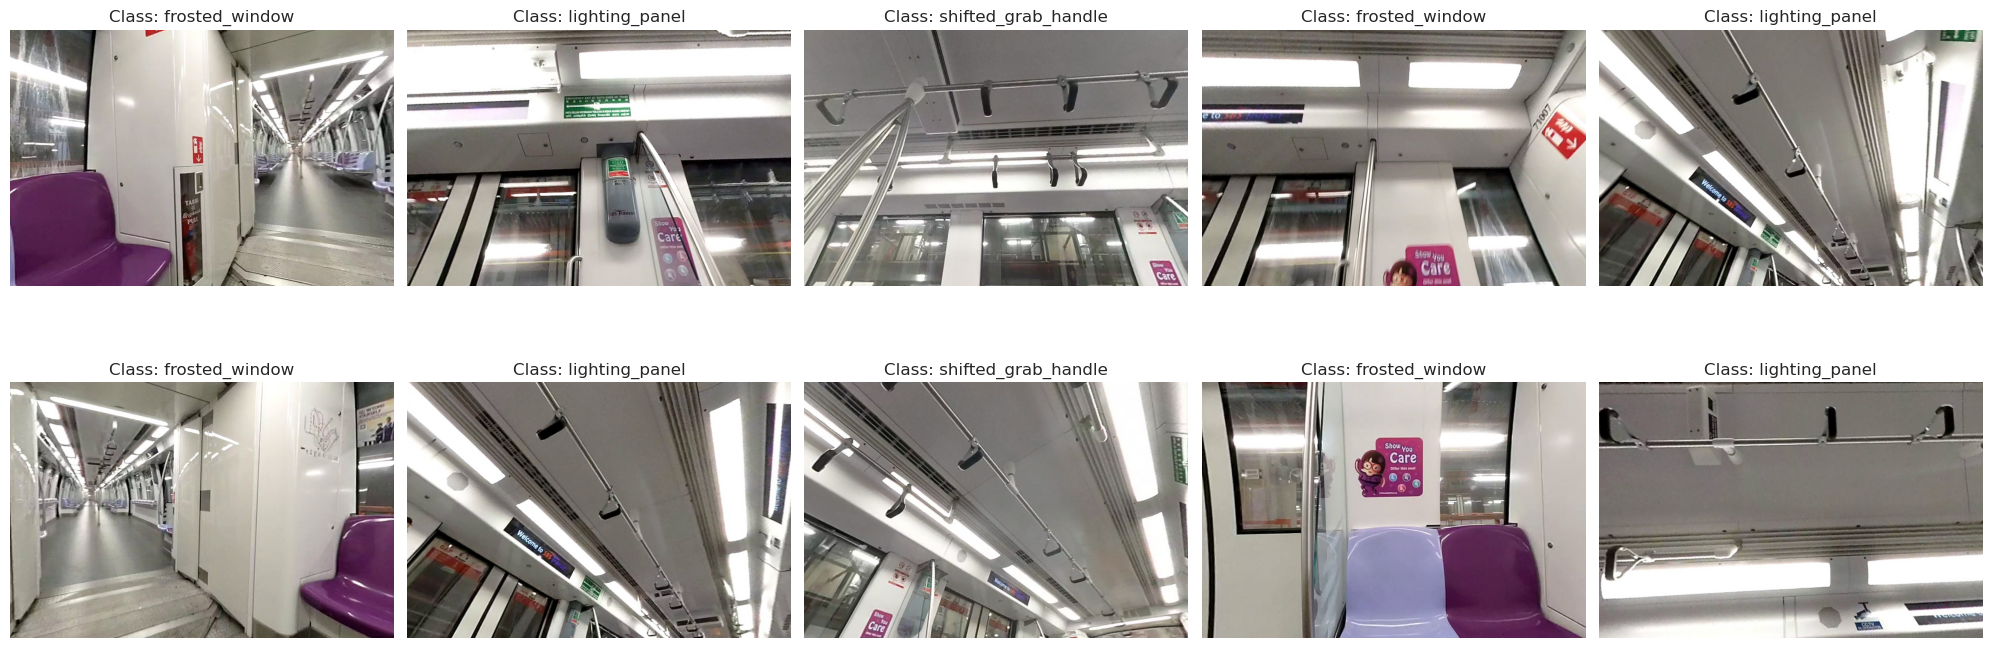

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random

# --- 1. CONFIGURATION ---
# IMPORTANT: Adjust these paths and lists to match your folder structure.

# Path to the parent folder containing the 'defect' and 'non_defect' directories
DATA_ROOT = 'Dataset/AR_Train/' 

# List the subfolders inside your 'defect' directory that you want to include
DEFECT_SUBFOLDERS = [
    'lighting_panel', 
    'frosted_window', 
    'shifted_grab_handle'
]

# List the subfolders inside your 'non_defect' directory
NON_DEFECT_SUBFOLDERS = [
    'lighting_panel', 
    'frosted_window', 
    'shifted_grab_handle'
]


# --- 2. DATA LOADING ---
# We now create three lists to hold all the information
filepaths = []
categories = [] # Will store 'defect' or 'non_defect'
target_classes = [] # Will store the specific class name like 'lighting_panel'

# Load DEFECT images
defect_path = os.path.join(DATA_ROOT, 'defect')
print(f"Scanning for defect images in: {defect_path}")
for folder in DEFECT_SUBFOLDERS:
    class_path = os.path.join(defect_path, folder)
    if os.path.exists(class_path):
        for filename in os.listdir(class_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                filepaths.append(os.path.join(class_path, filename))
                categories.append('defect')
                target_classes.append(folder) # Store the specific folder name

# Load NON-DEFECT images
non_defect_path = os.path.join(DATA_ROOT, 'non-defect')
print(f"Scanning for non-defect images in: {non_defect_path}")
for folder in NON_DEFECT_SUBFOLDERS:
    class_path = os.path.join(non_defect_path, folder)
    if os.path.exists(class_path):
        for filename in os.listdir(class_path):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                filepaths.append(os.path.join(class_path, filename))
                categories.append('non_defect')
                target_classes.append(folder) # Store the specific folder name

# Create the final DataFrame
if not filepaths:
    print("\n❌ Error: No images were found! Check your folder paths and names in the configuration.")
else:
    # Create a DataFrame with the new, more detailed columns
    df = pd.DataFrame({
        'filepath': filepaths, 
        'category': categories, 
        'target_class': target_classes
    })
    
    print(f"\n✅ Successfully loaded {len(df)} images.")
    print("\nTotal images per category:")
    print(df['category'].value_counts())
    print("\nTotal images per target class:")
    print(df['target_class'].value_counts())


    # --- 3. VISUAL COMPARISON ---
    print("\n--- Displaying Comparison: Defect vs. Non-Defect ---")
    
    num_samples = 5 # Number of images to display per category
    
    # Filter by the 'category' column now
    defect_samples = df[df['category'] == 'defect'].sample(n=num_samples, random_state=42)
    non_defect_samples = df[df['category'] == 'non_defect'].sample(n=num_samples, random_state=42)
    
    # Create a figure to display the images
    fig, axes = plt.subplots(2, num_samples, figsize=(20, 8))
    
    # Set titles for rows
    axes[0, 0].set_ylabel('Defect', fontsize=16, rotation=0, labelpad=40, verticalalignment='center')
    axes[1, 0].set_ylabel('Non-Defect', fontsize=16, rotation=0, labelpad=40, verticalalignment='center')

    # Display defect images
    for i, (_, row) in enumerate(defect_samples.iterrows()):
        img = Image.open(row['filepath'])
        axes[0, i].imshow(img)
        axes[0, i].axis('off')
        # NEW: Add a title with the target class
        axes[0, i].set_title(f"Class: {row['target_class']}", fontsize=12)
        
    # Display non-defect images
    for i, (_, row) in enumerate(non_defect_samples.iterrows()):
        img = Image.open(row['filepath'])
        axes[1, i].imshow(img)
        axes[1, i].axis('off')
        # NEW: Add a title with the target class
        axes[1, i].set_title(f"Class: {row['target_class']}", fontsize=12)
        
    plt.tight_layout(pad=1.0)
    plt.show()

In [1]:
import os
import pandas as pd

# --- Configuration ---
# Set the path to the top-level directory containing 'defect' and 'non_defect' folders.
DATA_ROOT = 'Dataset/AR_Train' # UPDATED

# Define the actual class folders you want to load
TARGET_CLASSES = [
    'lighting_panel', 
    'frosted_window', 
    'shifted_grab_handle'
    # Add any other class folders here
]

# --- Loading Logic ---
filepaths = []
labels = []
statuses = [] # NEW list to store defect/non-defect status

print(f"Scanning directory: {DATA_ROOT}")

# Walk through the directory structure
for root, dirs, files in os.walk(DATA_ROOT):
    # The current directory's name is a potential class label
    current_folder_name = os.path.basename(root)
    
    # Check if the current folder is one of our target classes
    if current_folder_name in TARGET_CLASSES:
        print(f"Found class: '{current_folder_name}'. Loading images...")
        
        # Get the parent folder's name (e.g., 'defect' or 'non_defect') for the status
        parent_folder_name = os.path.basename(os.path.dirname(root))
        
        for filename in files:
            # Make sure we're only adding image files
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                filepath = os.path.join(root, filename)
                
                filepaths.append(filepath)
                labels.append(current_folder_name) # This is the class (e.g., 'lighting_panel')
                statuses.append(parent_folder_name)  # This is the status (e.g., 'defect')

# --- Create a DataFrame for easy analysis ---
if not filepaths:
    print("\n❌ Error: No images were found!")
    print("Please check the 'DATA_ROOT' path and 'TARGET_CLASSES' list.")
else:
    # Create a DataFrame with three columns
    df = pd.DataFrame({
        'filepath': filepaths, 
        'label': labels, 
        'status': statuses # NEW 'status' column
    })
    print(f"\n✅ Successfully loaded {len(df)} images from {df['label'].nunique()} classes.")
    print("\nDataFrame Head:")
    print(df.head())

Scanning directory: Dataset/AR_Train
Found class: 'frosted_window'. Loading images...
Found class: 'lighting_panel'. Loading images...
Found class: 'shifted_grab_handle'. Loading images...
Found class: 'frosted_window'. Loading images...
Found class: 'lighting_panel'. Loading images...
Found class: 'shifted_grab_handle'. Loading images...

✅ Successfully loaded 3423 images from 3 classes.

DataFrame Head:
                                            filepath           label  status
0  Dataset/AR_Train/defect/frosted_window/2025-02...  frosted_window  defect
1  Dataset/AR_Train/defect/frosted_window/2025-02...  frosted_window  defect
2  Dataset/AR_Train/defect/frosted_window/2025-02...  frosted_window  defect
3  Dataset/AR_Train/defect/frosted_window/2025-02...  frosted_window  defect
4  Dataset/AR_Train/defect/frosted_window/2025-02...  frosted_window  defect



--- Running Defect vs. Non-Defect Analysis ---

Number of Defect and Non-Defect images per class:
status               defect  non-defect
label                                  
frosted_window          471         553
lighting_panel          818        1158
shifted_grab_handle     222         201


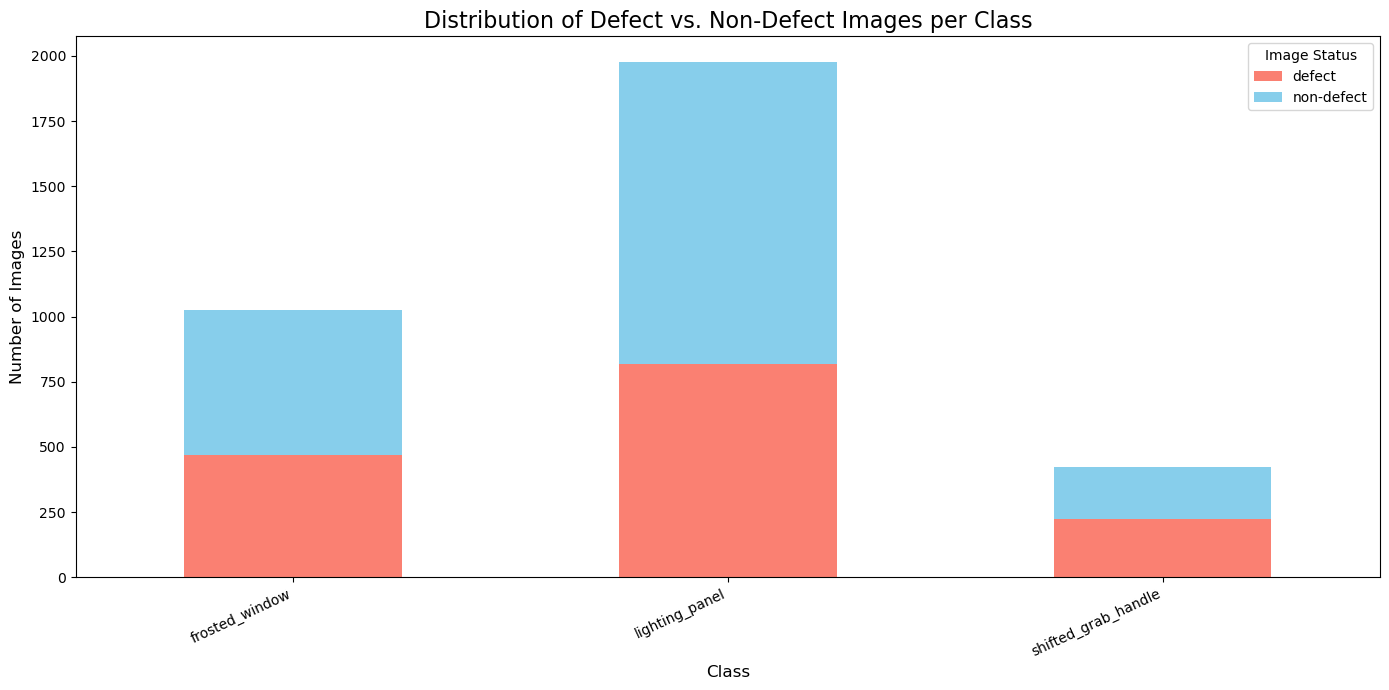

In [4]:
# --- 3a. ANALYZE DEFECT DISTRIBUTION ---
import matplotlib.pyplot as plt
print("\n--- Running Defect vs. Non-Defect Analysis ---")

# Use crosstab to create a summary table of counts
# It will use the 'label' for rows and 'status' for columns
defect_analysis = pd.crosstab(df['label'], df['status'])

print("\nNumber of Defect and Non-Defect images per class:")
print(defect_analysis)

# Visualize the breakdown with a stacked bar chart
defect_analysis.plot(kind='bar', stacked=True, figsize=(14, 7),
                     color={'defect': 'salmon', 'non-defect': 'skyblue'}) # Adjust colors as needed
plt.title('Distribution of Defect vs. Non-Defect Images per Class', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=25, ha='right')
plt.legend(title='Image Status')
plt.tight_layout()
plt.show()